In [1]:
import numpy as np
import pandas as pd
from keras import models, layers, optimizers
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


# Data loading

In [2]:
training_dataset = pd.read_csv('./train.csv')
test_dataset     = pd.read_csv('./test.csv')

# Data inspection

In [3]:
training_dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
training_dataset.shape

(42000, 785)

In [5]:
train_inputs = training_dataset.iloc[:,1:].values

In [6]:
train_inputs.shape

(42000, 784)

In [7]:
type(train_inputs)

numpy.ndarray

In [8]:
train_labels = training_dataset.iloc[:, 0].values

In [9]:
type(train_labels)

numpy.ndarray

In [10]:
train_labels.shape

(42000,)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_devtest, y_train, y_devtest = train_test_split(train_inputs, train_labels, test_size=0.2, random_state=42, 
                                                         stratify=train_labels)

In [13]:
X_train.shape

(33600, 784)

In [14]:
y_train.shape

(33600,)

In [15]:
type(X_train)

numpy.ndarray

In [16]:
type(y_train)

numpy.ndarray

In [17]:
unique, counts = np.unique(y_train, return_counts=True)

In [18]:
print(unique)

[0 1 2 3 4 5 6 7 8 9]


In [19]:
print(counts/counts.sum()*100)

[  9.83928571  11.15178571   9.94642857  10.36011905   9.69642857
   9.03571429   9.84821429  10.47916667   9.67261905   9.9702381 ]


In [20]:
unique, counts = np.unique(y_devtest, return_counts=True)
print(unique)
print(counts/counts.sum()*100)

[0 1 2 3 4 5 6 7 8 9]
[  9.83333333  11.1547619    9.94047619  10.35714286   9.69047619
   9.03571429   9.85714286  10.47619048   9.67857143   9.97619048]


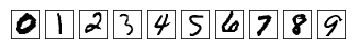

In [21]:
for i in range(0,10):
    plt.subplot(1,10,i+1)
    img = X_train[np.where(y_train == i)[0][0]].reshape(28,28)
    ax = plt.imshow(img, cmap='Greys')
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])

In [ ]:
# from keras.utils import to_categorical

y_train_enc = to_categorical(y_train)
y_train_enc.shape

In [ ]:
y_devtest_enc = to_categorical(y_devtest)
y_devtest_enc.shape

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train_sc = scaler.fit_transform(X_train.astype(np.float32))
X_devtest_sc = scaler.fit_transform(X_devtest.astype(np.float32))

In [ ]:
def plot_history(history):
    loss = history .history['loss']
    acc = history.history['acc']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_acc']
    max_acc = max(acc)
    max_val_acc = max(val_acc)
    min_loss = min(loss)
    min_val_loss = min(val_loss)
    epochs = range(1, len(acc) + 1)
    plt.figure(figsize=(7,8))
    ax211 = plt.subplot(211)
    plt.ylabel('loss')
    plt.title("8")
    min_losses_str = "min loss: {:.4f}\nmin validation loss: {:.4f}".format(min_loss, min_val_loss)
    plt.text(0.62, 0.25, min_losses_str, transform=ax211.transAxes, bbox=dict(alpha=0.25))
    plt.plot(epochs, loss, label='loss')
    plt.plot(epochs, val_loss, label='validation loss')
    plt.legend()
    ax212 = plt.subplot(212)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    max_accs_str = "max accuracy: {:.2f}%\nmax validation accuracy: {:.2f}%".format(max_acc*100, max_val_acc*100)
    plt.text(0.55, 0.70, max_accs_str, transform=ax212.transAxes, bbox=dict(alpha=0.25))
    plt.plot(epochs, acc, label='accuracy')
    plt.plot(epochs, val_acc, label = 'validation accuracy')
    plt.legend()

In [ ]:
def plot_histories(histories):
    n_histories = len(histories)
    plt.figure(figsize=(16,7))
    for i, h in enumerate(histories):
        history = histories[h]
        loss = history.history['loss']
        acc = history.history['acc']
        val_loss = history.history['val_loss']
        val_acc = history.history['val_acc']
        max_acc = max(acc)
        max_val_acc = max(val_acc)
        min_loss = min(loss)
        min_val_loss = min(val_loss)
        epochs = range(1, len(acc) + 1)
        ax211 = plt.subplot(2, n_histories, i+1)
        plt.ylabel('loss')
        min_losses_str = "min loss: {:.4f}\nmin validation loss: {:.4f}".format(min_loss, min_val_loss)
        plt.text(0.62, 0.25, min_losses_str, transform=ax211.transAxes, bbox=dict(alpha=0.25))
        plt.plot(epochs, loss, label='loss')
        plt.plot(epochs, val_loss, label='validation loss')
        plt.legend()
        ax212 = plt.subplot(2, n_histories, i+1+n_histories)
        plt.xlabel('epochs')
        plt.ylabel('accuracy')
        max_accs_str = "max accuracy: {:.2f}%\nmax validation accuracy: {:.2f}%".format(max_acc*100, max_val_acc*100)
        plt.text(0.55, 0.70, max_accs_str, transform=ax212.transAxes, bbox=dict(alpha=0.25))
        plt.plot(epochs, acc, label='accuracy')
        plt.plot(epochs, val_acc, label = 'validation accuracy')
        plt.legend()

In [ ]:
histories = dict()

In [ ]:
model_1 = models.Sequential()

In [ ]:
model_1.add(layers.Dense(10, activation='softmax', input_shape=(784,)))

In [ ]:
model_1.compile(optimizers.SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
histories[1] = model_1.fit(X_train_sc, y_train_enc, batch_size=128, epochs=20, validation_data=(X_devtest_sc, y_devtest_enc))

In [ ]:
plot_history(histories[1])

In [ ]:
layer_dims = [8,16,32,64,128,256, 512]
histories_2 = dict()
for i in layer_dims:
    print("Hidden layer size: {}".format(i))
    model = models.Sequential()
    model.add(layers.Dense(i, activation='sigmoid', input_shape=(784,)))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizers.SGD(), loss='categorical_crossentropy', metrics=['accuracy'])
    histories_2[i] = model.fit(X_train_sc, y_train_enc, batch_size=128, epochs=20, verbose=0, 
                               validation_data=(X_devtest_sc, y_devtest_enc))
    

In [ ]:
plot_history(histories_2[8])

In [ ]:
plot_history(histories_2[16])

In [ ]:
plot_history(histories_2[32])

In [ ]:
plot_history(histories_2[64])

In [ ]:
plot_history(histories_2[128])

In [ ]:
plot_history(histories_2[256])

In [ ]:
plot_history(histories_2[512])

In [ ]:
histories_3 = dict()
layer_dims = [8,16,32,64,128,256, 512]

for i in layer_dims:
    print("Hidden layer size: {}".format(i))
    model = models.Sequential()
    model.add(layers.Dense(i, activation='relu', input_shape=(784,)))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizers.SGD(), loss='categorical_crossentropy', metrics=['accuracy'])
    histories_3[i] = model.fit(X_train_sc, y_train_enc, batch_size=128, epochs=20, verbose=0, 
                               validation_data=(X_devtest_sc, y_devtest_enc))

In [ ]:
plot_history(histories_3[8])

In [ ]:
plot_history(histories_3[128])

In [ ]:
plot_history(histories_3[256])

In [ ]:
plot_history(histories_3[512])

In [ ]:
layer_dims = [8,16,32,64,128,256, 512]
histories_4 = dict()
for i in layer_dims:
    print("Hidden layer size: {}".format(i))
    model = models.Sequential()
    model.add(layers.Dense(i, activation='sigmoid', input_shape=(784,)))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizers.RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])
    histories_4[i] = model.fit(X_train_sc, y_train_enc, batch_size=128, epochs=20, verbose=0, 
                               validation_data=(X_devtest_sc, y_devtest_enc))


In [ ]:
plot_history(histories_4[8])

In [ ]:
plot_history(histories_4[16])

In [ ]:
plot_history(histories_4[32])

In [ ]:
plot_history(histories_4[64])

In [ ]:
plot_history(histories_4[128])

In [ ]:
plot_history(histories_4[256])

In [ ]:
plot_history(histories_4[512])

In [ ]:
layer_dims = [8,16,32,64,128,256, 512]
histories_5 = dict()
for i in layer_dims:
    print("Hidden layer size: {}".format(i))
    model = models.Sequential()
    model.add(layers.Dense(i, activation='relu', input_shape=(784,)))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizers.RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])
    histories_5[i] = model.fit(X_train_sc, y_train_enc, batch_size=128, epochs=20, verbose=0, 
                               validation_data=(X_devtest_sc, y_devtest_enc))


In [ ]:
plot_history(histories_5[8])

In [ ]:
plot_history(histories_5[16])

In [ ]:
plot_history(histories_5[32])

In [ ]:
plot_history(histories_5[64])

In [ ]:
plot_history(histories_5[128])

In [ ]:
plot_history(histories_5[256])

In [ ]:
plot_history(histories_5[512])

In [ ]:
plot_histories(histories_2[[64, 256, 512]])